# 2.1 Data

In [3]:
# Importo el dataset con pandas
import pandas as pd

data = pd.read_csv('Datasets/housing.csv')

## Análsis exploratorio de datos

In [4]:
#(1)
#Imprimo las primeras columnas
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
#Veo cuántos datos no nulos hay para cada feature
data.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

In [13]:
#(2)
#Hay una variable categórica: ocean_proximity
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
#(3)
#Divido el dataset en 2 partes
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)


(array([ 143., 1267., 3642., 1323.,  887., 2308., 5005., 1765.,  145.,
          27.]),
 array([-124.35 , -123.346, -122.342, -121.338, -120.334, -119.33 ,
        -118.326, -117.322, -116.318, -115.314, -114.31 ]),
 <BarContainer object of 10 artists>)

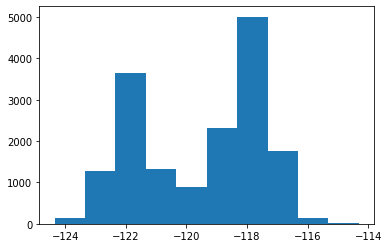

In [9]:
#(4)
#Hago un histograma de cada feature
import matplotlib.pyplot as plt
#train.plot.hist() #no funciona muy bien
plt.hist(train["longitude"])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

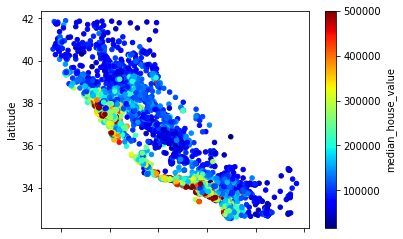

In [16]:
#Scatterplot de los precios sobre un mapa
#data.plot.scatter(x='longitude', y='latitude')
train.plot.scatter(x='longitude', y='latitude', c='median_house_value', cmap='jet')


In [22]:
#Matriz de correlaciones
train.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925046,-0.110000,0.044722,0.070137,0.100935,0.056171,-0.015200,-0.046356
latitude,-0.925046,1.000000,0.012515,-0.037102,-0.068115,-0.110562,-0.072257,-0.079396,-0.142773
housing_median_age,-0.110000,0.012515,1.000000,-0.360041,-0.317807,-0.292608,-0.299791,-0.123689,0.105180
total_rooms,0.044722,-0.037102,-0.360041,1.000000,0.930172,0.857836,0.919282,0.203700,0.138871
total_bedrooms,0.070137,-0.068115,-0.317807,0.930172,1.000000,0.879730,0.981062,-0.003132,0.053928
population,0.100935,-0.110562,-0.292608,0.857836,0.879730,1.000000,0.907810,0.006964,-0.021847
households,0.056171,-0.072257,-0.299791,0.919282,0.981062,0.907810,1.000000,0.018490,0.070036
median_income,-0.015200,-0.079396,-0.123689,0.203700,-0.003132,0.006964,0.018490,1.000000,0.689192
median_house_value,-0.046356,-0.142773,0.105180,0.138871,0.053928,-0.021847,0.070036,0.689192,1.000000


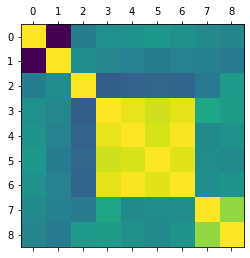

In [23]:
plt.matshow(train.corr())

In [34]:
#(6)
#Elimino los NaNs

#opción 1: elimino las filas con NaNs
#train.dropna() #Pasa de 16512 a 16342 filas

#opción 2: elimino las columnas con NaNs
#train.dropna(axis = 1) #Quita una columna

#opción 3: reemplazo los NaNs por la media de la columna (podría ser tmb la moda, la mediana, algún valor random entre el 4to y 6to cuartil, etc.)
train.fillna(train.mean()) #Creo que esto hacer lo que quiero: saca la media de cada columna, y reemplaza los NaNs por esa media.


C:\Users\lupam\AppData\Local\Temp\ipykernel_10976\3405544879.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.mean()


longitude               -119.571607
latitude                  35.632729
housing_median_age        28.650678
total_rooms             2633.302871
total_bedrooms           536.868682
population              1424.220082
households               499.067163
median_income              3.869687
median_house_value    206877.463542
dtype: float64